C:\Users\logic\AppData\Local\Temp\ipykernel_22844\741566013.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Lookback ALERT: Recent RSI indicates oversold on 2020-01-09 at price 74.78
Lookback ALERT: Recent RSI indicates oversold on 2020-01-10 at price 74.95
Lookback ALERT: Recent RSI indicates oversold on 2020-01-13 at price 76.55
Lookback ALERT: Recent RSI indicates oversold on 2020-01-14 at price 75.52
Lookback ALERT: Recent RSI indicates oversold on 2020-01-15 at price 75.19
Lookback ALERT: Recent RSI indicates oversold on 2020-01-16 at price 76.13
Lookback ALERT: Recent RSI indicates oversold on 2020-01-17 at price 76.98
Lookback ALERT: Recent RSI indicates oversold on 2020-01-21 at price 76.46
Lookback ALERT: Recent RSI indicates oversold on 2020-01-22 at price 76.73
Lookback ALERT: Recent RSI indicates oversold on 2020-01-23 at price 77.10
Lookback ALERT: Recent RSI indicates oversold on 2020-01-24 at price 76.88
Lookback ALERT: Recent RSI indicates oversold on 2020-01-27 at price 74.62
Lookback ALERT: Recent RSI indicates oversold on 2020-01-28 at price 76.73
Lookback ALERT: Recent RS

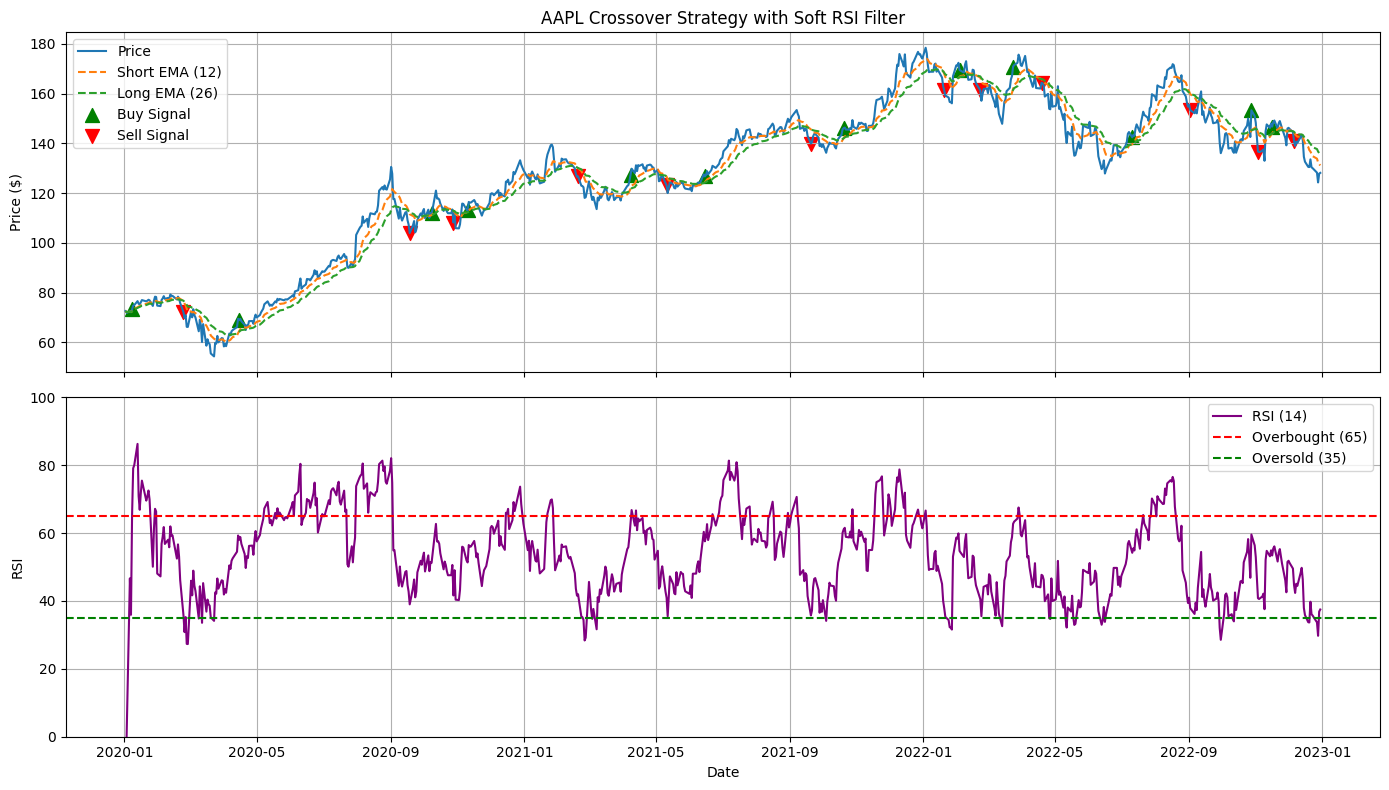

C:\Users\logic\AppData\Local\Temp\ipykernel_22844\741566013.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Summary of trades for AAPL:
Buy Trades: 12
Sell Trades: 12
Ending Cash: $104,215.36
Realized Profit: $4,215.36



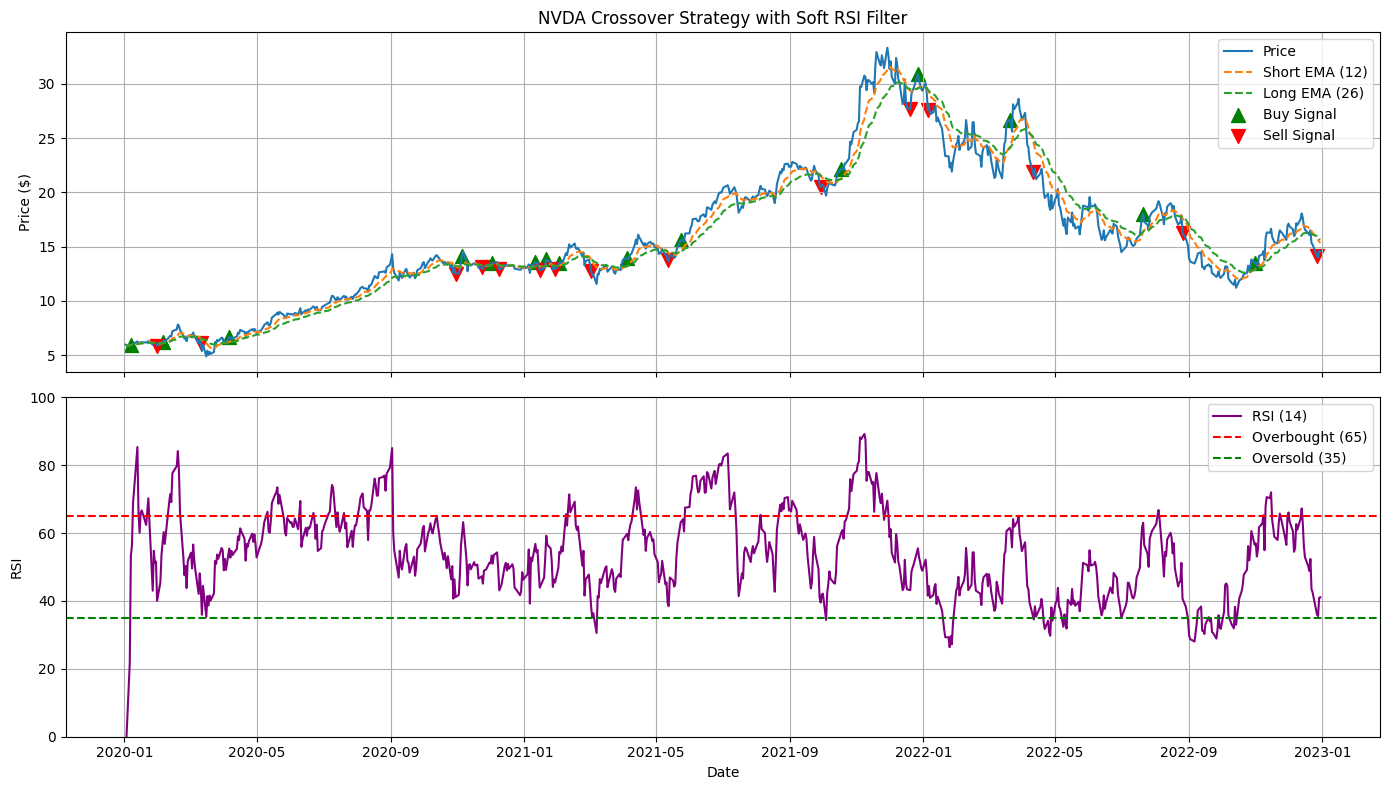


Summary of trades for NVDA:
Buy Trades: 15
Sell Trades: 15
Ending Cash: $104,462.30
Realized Profit: $246.94



C:\Users\logic\AppData\Local\Temp\ipykernel_22844\741566013.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Lookback ALERT: Recent RSI indicates oversold on 2020-01-09 at price 32.09
Lookback ALERT: Recent RSI indicates oversold on 2020-01-10 at price 31.88
Lookback ALERT: Recent RSI indicates oversold on 2020-01-13 at price 34.99
Lookback ALERT: Recent RSI indicates oversold on 2020-01-14 at price 35.86
Lookback ALERT: Recent RSI indicates oversold on 2020-01-15 at price 34.57
Lookback ALERT: Recent RSI indicates oversold on 2020-01-16 at price 34.23
Lookback ALERT: Recent RSI indicates oversold on 2020-01-17 at price 34.03
Lookback ALERT: Recent RSI indicates oversold on 2020-01-21 at price 36.48
Lookback ALERT: Recent RSI indicates oversold on 2020-01-22 at price 37.97
Lookback ALERT: Recent RSI indicates oversold on 2020-01-23 at price 38.15
Lookback ALERT: Recent RSI indicates oversold on 2020-01-24 at price 37.65
Lookback ALERT: Recent RSI indicates oversold on 2020-01-27 at price 37.20
Lookback ALERT: Recent RSI indicates oversold on 2020-01-28 at price 37.79
Lookback ALERT: Recent RS

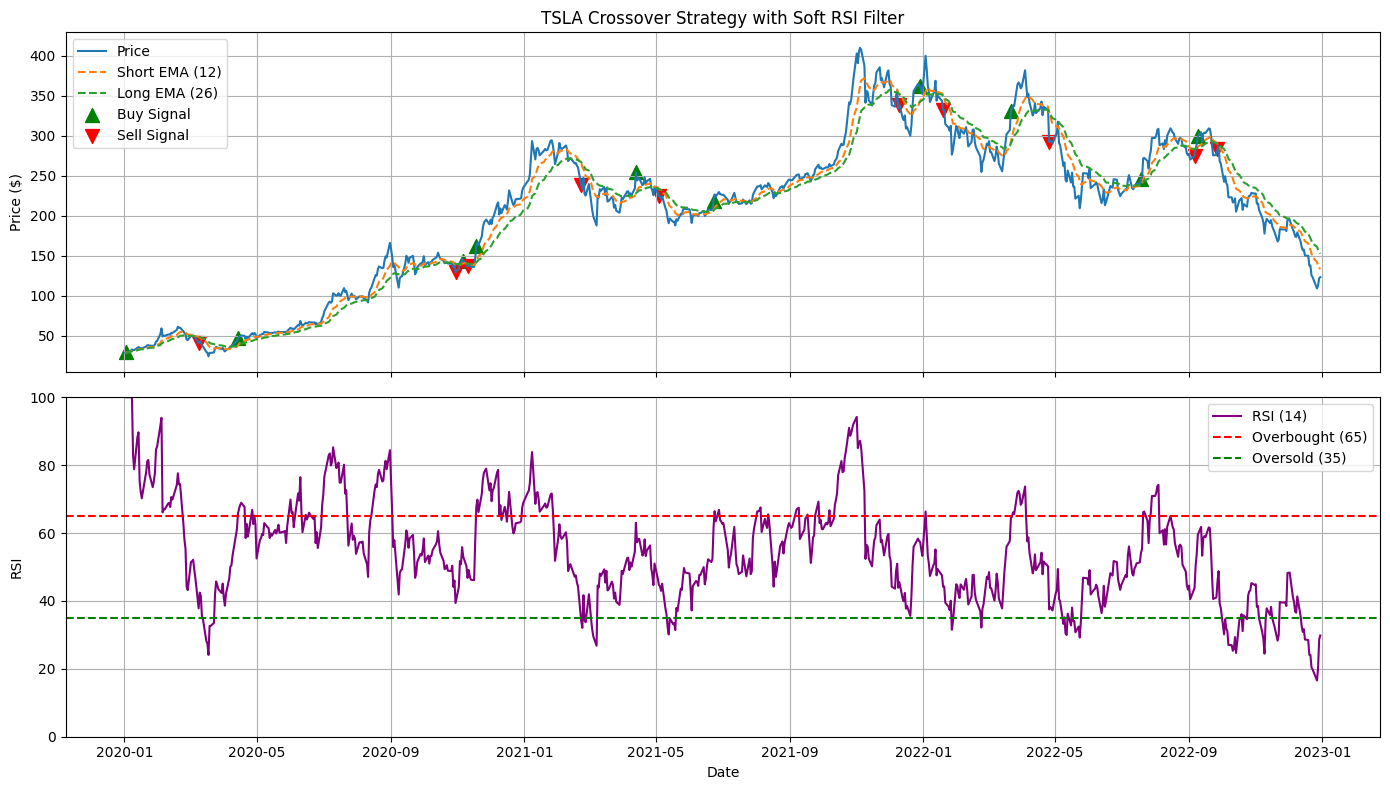


Summary of trades for TSLA:
Buy Trades: 10
Sell Trades: 10
Ending Cash: $124,042.98
Realized Profit: $19,580.67

All strategies completed.

Final Summary for all tickers:
Ticker  Buy Trades  Sell Trades   Ending Cash  Realized Profit   ROI (%)
  AAPL          12           12 104215.359497      4215.359497  4.215359
  NVDA          15           15 104462.304211       246.944714  4.462304
  TSLA          10           10 124042.976665     19580.672455 24.042977

Total Realized Profit Across All Tickers: $24,042.98
Ending Cash After All Trades: $124,042.98
Thank you for using TradeVision!


In [ ]:
#READ THIS:!!!!!!!!
#Read Real Stock Testing TODO List.md for more information on what to do next.

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# SETTINGS

tickers = input("Enter ticker symbols separated by commas (e.g., AAPL,MSFT): ").upper().split(',')
#User Input Start and End data taken away for testing purposes
start_date = "2020-01-01"
end_date = "2023-01-01"
#start_date = input("Enter the start date (YYYY-MM-DD): ")
#end_date = input("Enter the end date (YYYY-MM-DD): ")

#User Input for Moving Average Window Sizes taken away for testing purposes
short_window = 12
long_window = 26
#short_window = int(input("Enter the window size for short-term SMA/EMA: "))
#long_window = int(input("Enter the window size for long-term SMA/EMA: "))
use_ema_input = input("Use EMA instead of SMA? (True/False): ").strip().lower()
use_ema = (use_ema_input in ['true', 't', 'yes', 'y', 'e'])


#User Input for Starting Cash and Shares per Trade taken away for testing purposes
starting_cash = 100000
shares_per_trade = 100
#starting_cash = float(input("Enter starting capital (e.g., 100000): "))
#shares_per_trade = int(input("Enter number of shares per buy/sell (e.g., 100): "))

total_realized_profit = 0
ending_cash = starting_cash
all_results = []




def backtest_crossover(ticker):
    global total_realized_profit, ending_cash
   

    print(f"\nDownloading data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)

    if data.empty:
        print(f"No data found for {ticker}. Skipping.\n")
        return

    prices = data['Close'].squeeze()

    # Calculate moving averages
    if use_ema:
        short_ma = prices.ewm(span=short_window).mean()
        long_ma = prices.ewm(span=long_window).mean()
    else:
        short_ma = prices.rolling(window=short_window).mean()
        long_ma = prices.rolling(window=long_window).mean()
    
    # Calculates RSI
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    #User Input for RSI window size taken away for testing purposes
    rsiwindow = 14
    #rsiwindow = int(input("Enter the window size for RSI calculation (e.g., 14 STD): "))
    rsidelta = 100 - (100/(1+gain.ewm(alpha=1/rsiwindow, adjust=False).mean()/loss.ewm(alpha=1/rsiwindow,adjust=False).mean())) 
    

    # RSI overbought/oversold levels
    rsi_overbought = 65
    rsi_oversold = 35

    # Ask user if they want to use RSI filter
   #use_rsi_fliter = input("Use RSI filter for buy/sell signals? (True/False): ").strip().lower() == 'true'

    # Generate signals: Buy, Sell, Hold
    signals = ['Hold']
    for i in range(1, len(prices)):
        if short_ma.iloc[i] > long_ma.iloc[i] and short_ma.iloc[i-1] <= long_ma.iloc[i-1]:
            if rsidelta.iloc[i] < rsi_oversold: #or not use_rsi_fliter:  # Buy only if RSI indicates oversold
                signals.append('Strong Buy')
                print(f"ALERT: Strong Buy signal on {prices.index[i].date()} at price {prices.iloc[i]:.2f}")
            else:
                signals.append('Buy')

        elif short_ma.iloc[i] < long_ma.iloc[i] and short_ma.iloc[i-1] >= long_ma.iloc[i-1]:
            if rsidelta.iloc[i] > rsi_overbought: #or not use_rsi_fliter:  # Sell only if RSI indicates overbought
                signals.append('Strong Sell')
                print(f"ALERT: Strong Sell signal on {prices.index[i].date()} at price {prices.iloc[i]:.2f}")
            else:
                signals.append('Sell')
        else:
            signals.append('Hold')
    

    #Look back RSI check trading logic
    #User Input for Lookback period for RSI signal taken away for testing purposes
        #lookback = int(input("Enter lookback period for RSI signal (e.g., 5): "))

#Short-term: 2–3 periods — more sensitive, reacts faster, but more noise.
#Medium-term: 5–7 periods — smoother, avoids false signals from single-day spikes.
#Long-term: 10+ periods — very conservative, only catches strong moves.

    #Currently Lookback for RSI is in Days. Consider changing to minutes or Hours for more Day trading style
    Lookback = 5
    recent_rsi = rsidelta.iloc[max(0, i-Lookback):i+1]

    lookback_signals = ['Hold'] * len(prices)
    for i in range(Lookback, len(prices)):
        if recent_rsi.min() < rsi_oversold:
            print(f"Lookback ALERT: Recent RSI indicates oversold on {prices.index[i].date()} at price {prices.iloc[i]:.2f}")
            lookback_signals[i]='Buy Lookback RSI Confirmed'
        if recent_rsi.max() > rsi_overbought:
            print(f"Lookback ALERT: Recent RSI indicates overbought on {prices.index[i].date()} at price {prices.iloc[i]:.2f}")
            lookback_signals[i]='Sell Lookback RSI Confirmed'

    # Simulate trades
    position = 0
    cash = ending_cash
    portfolio_values = []
    buy_signals_dates = []
    buy_signals_prices = []
    sell_signals_dates = []
    sell_signals_prices = []
    buy_trades = 0
    sell_trades = 0
    profit = 0
    cost_basis = 0

    for i in range(len(prices)):
        price = prices.iloc[i]
        signal = signals[i]

        if signal == 'Buy' and position == 0:
            cost = price * shares_per_trade
            if cash >= cost:
                cash -= cost
                position = shares_per_trade
                cost_basis = price
                buy_trades += 1
                buy_signals_dates.append(prices.index[i])
                buy_signals_prices.append(price)
            else:
                # Not enough cash to buy
                signals[i] = 'Hold'

        elif signal == 'Sell' and position > 0:
            cash += price * position
            profit += (price - cost_basis) * position
            position = 0
            sell_trades += 1
            sell_signals_dates.append(prices.index[i])
            sell_signals_prices.append(price)

        # Track portfolio value each day
        portfolio_value = cash + position * price
        portfolio_values.append(portfolio_value)

    # Finalize if holding position at the end
    if position > 0:
        final_price = prices.iloc[-1]
        cash += final_price * position
        profit += (final_price - cost_basis) * position
        sell_signals_dates.append(prices.index[-1])
        sell_signals_prices.append(final_price)
        position = 0
        sell_trades += 1
        portfolio_values[-1] = cash
    total_realized_profit += profit
    ending_cash = cash

    roi_percent = (ending_cash - starting_cash) / starting_cash * 100

    all_results.append({
        'Ticker': ticker,
        'Buy Trades': buy_trades,
        'Sell Trades': sell_trades,
        'Ending Cash': cash,
        'Realized Profit': profit,
        'ROI (%)': roi_percent
    })

    # Plotting
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

    # --- Price and MAs ---
    ax1.plot(prices.index, prices, label='Price')
    ax1.plot(prices.index, short_ma, '--', label=f'Short {"EMA" if use_ema else "SMA"} ({short_window})')
    ax1.plot(prices.index, long_ma, '--', label=f'Long {"EMA" if use_ema else "SMA"} ({long_window})')
    ax1.scatter(buy_signals_dates, buy_signals_prices, marker='^', color='green', label='Buy Signal', s=100)
    ax1.scatter(sell_signals_dates, sell_signals_prices, marker='v', color='red', label='Sell Signal', s=100)
    ax1.set_title(f"{ticker} Crossover Strategy with Soft RSI Filter")
    ax1.set_ylabel("Price ($)")
    ax1.legend()
    ax1.grid(True)

    # --- RSI ---
    ax2.plot(prices.index, rsidelta, label= f'RSI ({rsiwindow})', color='purple')
    ax2.axhline(rsi_overbought, color='red', linestyle='--', label=f'Overbought ({rsi_overbought})')
    ax2.axhline(rsi_oversold, color='green', linestyle='--', label=f'Oversold ({rsi_oversold})')
    ax2.set_ylabel("RSI")
    ax2.set_ylim(0, 100)
    ax2.set_xlabel("Date")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Print trade summary for this ticker
    print(f"\nSummary of trades for {ticker}:")
    print(f"Buy Trades: {buy_trades}")
    print(f"Sell Trades: {sell_trades}")
    print(f"Ending Cash: ${cash:,.2f}")
    print(f"Realized Profit: ${profit:,.2f}")



# Run strategy for each ticker
for ticker in tickers:
    backtest_crossover(ticker)

# Final summary
results_df = pd.DataFrame(all_results)
print("\nAll strategies completed.")
print("\nFinal Summary for all tickers:")
print(results_df.to_string(index=False))
print(f"\nTotal Realized Profit Across All Tickers: ${total_realized_profit:,.2f}")
print(f"Ending Cash After All Trades: ${ending_cash:,.2f}")
print("Thank you for using Quantara!")